In [24]:
#import modules
import pandas as pd
import geopandas as gpd
import numpy as np
import xarray as xr
import netCDF4
import glob as glob
from matplotlib import pyplot as plt
from ease_grid import EASE2_grid
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
#set filepth for accessing VOD data
vod_filepath = '/Users/student/Documents/VOD_Project/MTDCA_9km_V4_nc/'

#created monthly VOD filepath
vod_saved = '/Users/student/Documents/VOD_Project/'

In [13]:
# need to convert latent energy to mm/month for canopy transpiration
lambda_e = 2.460*10**6      # J kg^-1
roe_w = 1000                # kg m^-3
m_2_mm = 1000               # convert m to mm
s_2_mon = 60*30*48 #*30.5     #30.5 is days.

In [17]:
#FUNCTIONS

#function to index VOD by month
def get_vod(value, time1,time2):
    new_array = value
    #new_array['VWC'] = (new_array['VOD']/0.11) # VOD = VWC * .11
    new_array = new_array['VOD']
    vod_time = new_array.loc[time1:time2] #"2019-01-01":"2019-01-31"
    vod_time = vod_time.groupby('time.year').mean('time')
    vod_time = vod_time.drop('year', dim=None)
    vod_time = vod_time.squeeze("year")
    return vod_time

#

##function to save file
def save_vod_file(file,extension):
    vod_path = (vod_saved + extension)
    file.to_netcdf(path = vod_path)
    file.close()

    
#

#open VOD file
def open_vod(extension):
    new = xr.open_dataset(vod_saved + extension)
    new_2 = new.where(new.VWC.data > 0) #filter out pixels with no VWC
    return new_2

#

#convert xy to lat lon for the transpiration data
def convert_xy_to_lat_lon(SMAP_ET_DATA):
    lons = SMAP_ET_DATA.lon.data[0,:]
    lats = SMAP_ET_DATA.lat.data[:,0]
    # times = SMAP_ET_DATA.time.data
    out_ds = xr.Dataset(coords={'lat': lats,
                                'lon': lons
                                # ,'time': times #<-- you can do this for the entire smap dataset
                               })
    data_array = SMAP_ET_DATA.SMAPcanopy_transpiration.data
    out_ds['transp_Wm2']=(['lat','lon'], data_array)
    return out_ds

#

def get_km_cubed(x):
    
    x = x/1000 #convert mm/m^2 to m/m^2
    x = x*(9200^2) #convert to cubic m (multiply by length and width of each pixel: 9 by 9 km)
    x = x*1e-9 # multiply by this value to get cubic km from cubic m.
    
    return x 

#

In [15]:
#create and save VOD
vod_201704_201706 = xr.open_dataset(vod_filepath + 'MTDCA_201704_201706_9km_V4.nc')


#create vod for month
vod_june_2017 = get_vod(vod_201704_201706,"2017-06-01","2017-06-30")

#save
save_vod_file(vod_june_2017,'june_2017.nc')

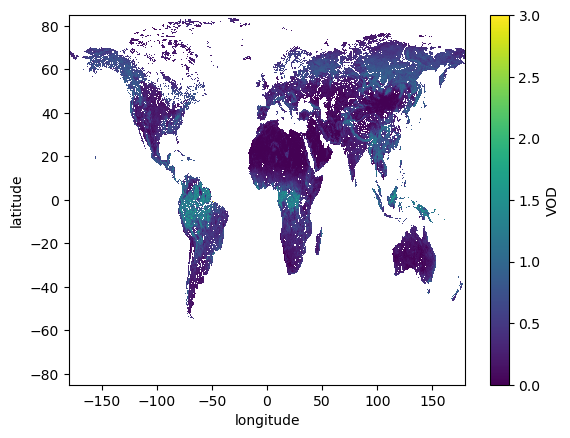

In [16]:
vod_june_2017.plot()

In [18]:
look_june = vod_june_2017.to_dataframe()
look_june.describe()

,VOD
count,1.412814e+06
mean,4.189954e-01
std,3.388464e-01
min,4.441531e-13
25%,1.553377e-01
50%,3.439742e-01
75%,6.244514e-01
max,3.000000e+00


In [19]:
vod_june_2017

<xarray.DataArray 'VOD' (lat: 1624, lon: 3856)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * lat      (lat) float32 84.66 83.95 83.33 82.75 ... -83.33 -83.95 -84.66
  * lon      (lon) float32 -180.0 -179.9 -179.8 -179.7 ... 179.8 179.9 180.0